### **CMP7005 - Programming for Data Analysis - Assessment**

**Why I chose this research question**

For this project, I chose to analyse India’s air-quality data because air pollution has become one of the country’s most significant public health and environmental challenges over the past decade. Cities across India consistently rank among the most polluted globally, and understanding how pollutant levels change over time is essential for informing policy, public awareness, and urban planning.

The dataset includes daily measurements of main pollutants (PM2.5, PM10, NOx gases, CO, SO₂, O₃), volatile organic compounds (benzene, toluene, xylene), and AQI results from 2015 to 2020. This makes it an excellent resource for researching seasonal variations, long-term trends, and the connections between air quality and contaminants.

**This research is important for several reasons:**

**Public Health Impact**

Respiratory and cardiovascular diseases are directly linked to high levels of harmful gases and particulate matter, particularly PM2.5 and PM10. Understanding pollutant patterns can help identify periods or locations with elevated risk.

**Environmental and Policy Relevance**

Government initiatives such as the National Clean Air Programme (NCAP) aim to reduce pollution levels, but assessing their effectiveness requires data-driven insights. This dataset allows investigation into whether air quality improved or deteriorated over time.

**Urban and Industrial Growth**

Many Indian cities have undergone rapid industrialisation and urban expansion between 2015–2020, potentially affecting pollutant emissions. This makes the question relevant for understanding how human activity influences air quality.

**Predictive and Analytical Value**

With AQI data included, this dataset provides an opportunity to explore whether pollutant concentrations can reliably predict air-quality outcomes, which is valuable for forecasting models and early warning systems.

**The aim of my analysis is to generate meaningful insights into India’s air-quality trends and pollutant behaviour.**

**Identify Trends**

How pollutant levels changed from 2015–2020 across different cities.

Whether certain pollutants show seasonal or long-term patterns.

**Understand Relationships Between Pollutants**

How pollutants (e.g., PM2.5, PM10, NOx, VOCs) correlate with one another.

Which pollutants most strongly influence the Air Quality Index (AQI).

**Explore Geographic Variation**

Which cities consistently experience poor air quality.

How urban vs industrial regions differ in pollutant composition.

**Predict Air Quality**

Whether machine-learning models can accurately predict AQI or AQI categories from raw pollutant data.

Which features contribute most to accurate predictions.

# Importing the required libraries

In [32]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Mounting the drive

In [33]:
# Loading the Drive helper and mount
from google.colab import drive

# This will prompt for authorisation.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Change the path according to the location of the data
%cd '/content/drive/MyDrive/Prog Data Analysis Assessment'

/content/drive/MyDrive/Prog Data Analysis Assessment


In [35]:
%ls # Shows all the content of the folder

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


# Merging of the csv files:

In [36]:
drive_path = '/content/drive/MyDrive/Prog Data Analysis Assessment'

In [37]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

# Data Preprocessing


In [38]:
# Using df.head() to display the first five rows of the dataset for an initial overview.
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Jorapokhar,20/04/2017,NaN,119.49,7.75,9.26,NaN,NaN,0.32,28.43,18.88,NaN,NaN,NaN,NaN,NaN
1,Jorapokhar,21/04/2017,NaN,170.61,8.00,10.20,NaN,NaN,0.27,29.35,15.85,NaN,NaN,NaN,148.0,Moderate
2,Jorapokhar,22/04/2017,NaN,124.64,7.92,9.45,NaN,NaN,0.29,33.34,17.76,NaN,NaN,NaN,135.0,Moderate
3,Jorapokhar,23/04/2017,NaN,107.36,7.74,9.39,NaN,NaN,0.31,34.10,21.71,NaN,NaN,NaN,107.0,Moderate
4,Jorapokhar,24/04/2017,NaN,178.28,7.49,10.72,NaN,NaN,0.33,38.16,17.94,NaN,NaN,NaN,124.0,Moderate


In [39]:
# Using df.tail() to display the last five rows of the dataset for an initial overview.
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Gurugram,27/06/2020,47.82,158.08,3.12,8.05,7.24,3.33,0.66,9.18,19.54,2.16,4.78,5.27,121.0,Moderate
29527,Gurugram,28/06/2020,64.72,261.05,5.62,9.65,8.97,3.43,0.67,7.82,17.28,2.65,3.59,5.16,153.0,Moderate
29528,Gurugram,29/06/2020,46.89,154.00,4.00,8.97,9.65,3.05,0.57,7.86,36.50,2.34,3.84,4.72,140.0,Moderate
29529,Gurugram,30/06/2020,47.27,114.29,6.29,10.38,12.08,3.20,0.78,7.36,58.07,2.40,4.30,4.89,131.0,Moderate
29530,Gurugram,01/07/2020,61.64,174.08,5.99,10.58,12.37,2.91,1.11,7.57,44.14,2.67,4.46,4.73,157.0,Moderate


In [40]:
# Used df.info() to get a quick summary of the dataset’s structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [41]:
# Used df.columns to view all the column names in the dataset.
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [42]:
# Used df.shape to see the dimensions of the dataset.
df.shape

(29531, 16)

In [43]:
# Counting how many times each city appears in the dataset.
City = df['City'].value_counts()
print(f'Total number of Cities in the dataset : {len(City)}')
City

Total number of Cities in the dataset : 26


,count
City,
Delhi,2009
Lucknow,2009
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [44]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [45]:
# Making sure that Date is datetime and sorted by City + Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


Defining which columns will use what method to fill the missing values.

In [46]:
# Columns with *very* high missing % (≈ >30%)
high_missing_cols = ['Xylene', 'PM10', 'NH3']

# All numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Numeric columns with lower missing % (we'll interpolate + ffill/bfill)
low_missing_cols = [c for c in numeric_cols if c not in high_missing_cols]


Time-series interpolation for low-missing pollutants.

In [47]:
# Interpolate and fill low-missing columns within each city group
df[low_missing_cols] = (

    # Group the dataframe by City, but only operate on the low_missing columns
    df.groupby('City')[low_missing_cols]

      # Apply a function to each group (each city's time series)
      .apply(
          lambda g:
              g.interpolate(limit_direction='both')   # 1. Interpolate missing values over time
               .ffill()                               # 2. Forward-fill any remaining gaps
               .bfill()                               # 3. Backward-fill gaps at the start
      )

      # The groupby will return a multi-index, so reset the index to align with df
      .reset_index(level=0, drop=True)
)


Model-based imputation (MICE) for high-missing pollutants.

In [48]:
# Import the IterativeImputer (MICE) — requires enabling the experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create the imputer
# random_state=42 ensures results are reproducible each time you run it
imputer = IterativeImputer(random_state=42)

# Fit the imputer on all numeric columns, then transform them
# This uses the relationships between features to estimate missing values
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Fill AQI_Bucket (categorical) with forward/backward fill.

In [49]:
# AQI_Bucket is usually categorical, so we don't use numeric imputers.
df['AQI_Bucket'] = (
    df.groupby('City')['AQI_Bucket']
      .apply(lambda s: s.ffill().bfill())
      .reset_index(level=0, drop=True)
)


We now have no missing values after using different techniques to fill the columns with missing values.

In [50]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
NO,0,0.000000
NO2,0,0.000000
NOx,0,0.000000
NH3,0,0.000000
CO,0,0.000000
SO2,0,0.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

# Exploratory Data Analysis


In [52]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,71.042188,0.04,26.75,48.05,84.868441,949.99,74.679338
PM10,29531.0,123.527016,-1230.660591,64.56,100.18,165.895,1000.0,130.247904
NO,29531.0,23.015583,0.02,5.93,10.4,23.23,390.68,33.385821
NO2,29531.0,27.033618,0.01,10.65,20.27,35.24,362.21,23.859672
NOx,29531.0,32.363749,-11.668245,13.15,23.36,39.958966,467.63,31.664548
NH3,29531.0,25.931699,-520.524957,9.85,20.380485,32.367831,352.89,31.935284
CO,29531.0,3.328664,0.0,0.5,0.91,1.51,175.81,13.002122
SO2,29531.0,22.407083,0.01,5.87,9.69,17.84,193.86,38.781125
O3,29531.0,33.266634,-2.901761,17.320652,29.19,43.828103,257.73,21.321582


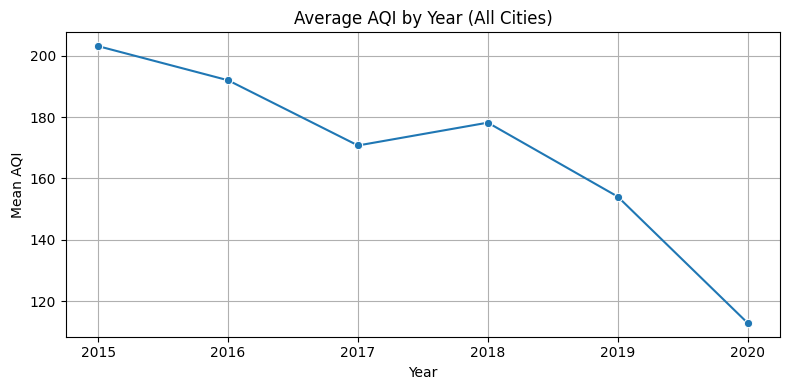

In [56]:
pollutant_cols = [
    "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3",
    "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"
]

# Make sure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Time features from index
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Month_name"] = df.index.month_name()

# Example: yearly AQI trend
yearly_aqi = df.groupby("Year")["AQI"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_aqi, x="Year", y="AQI", marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.ylabel("Mean AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


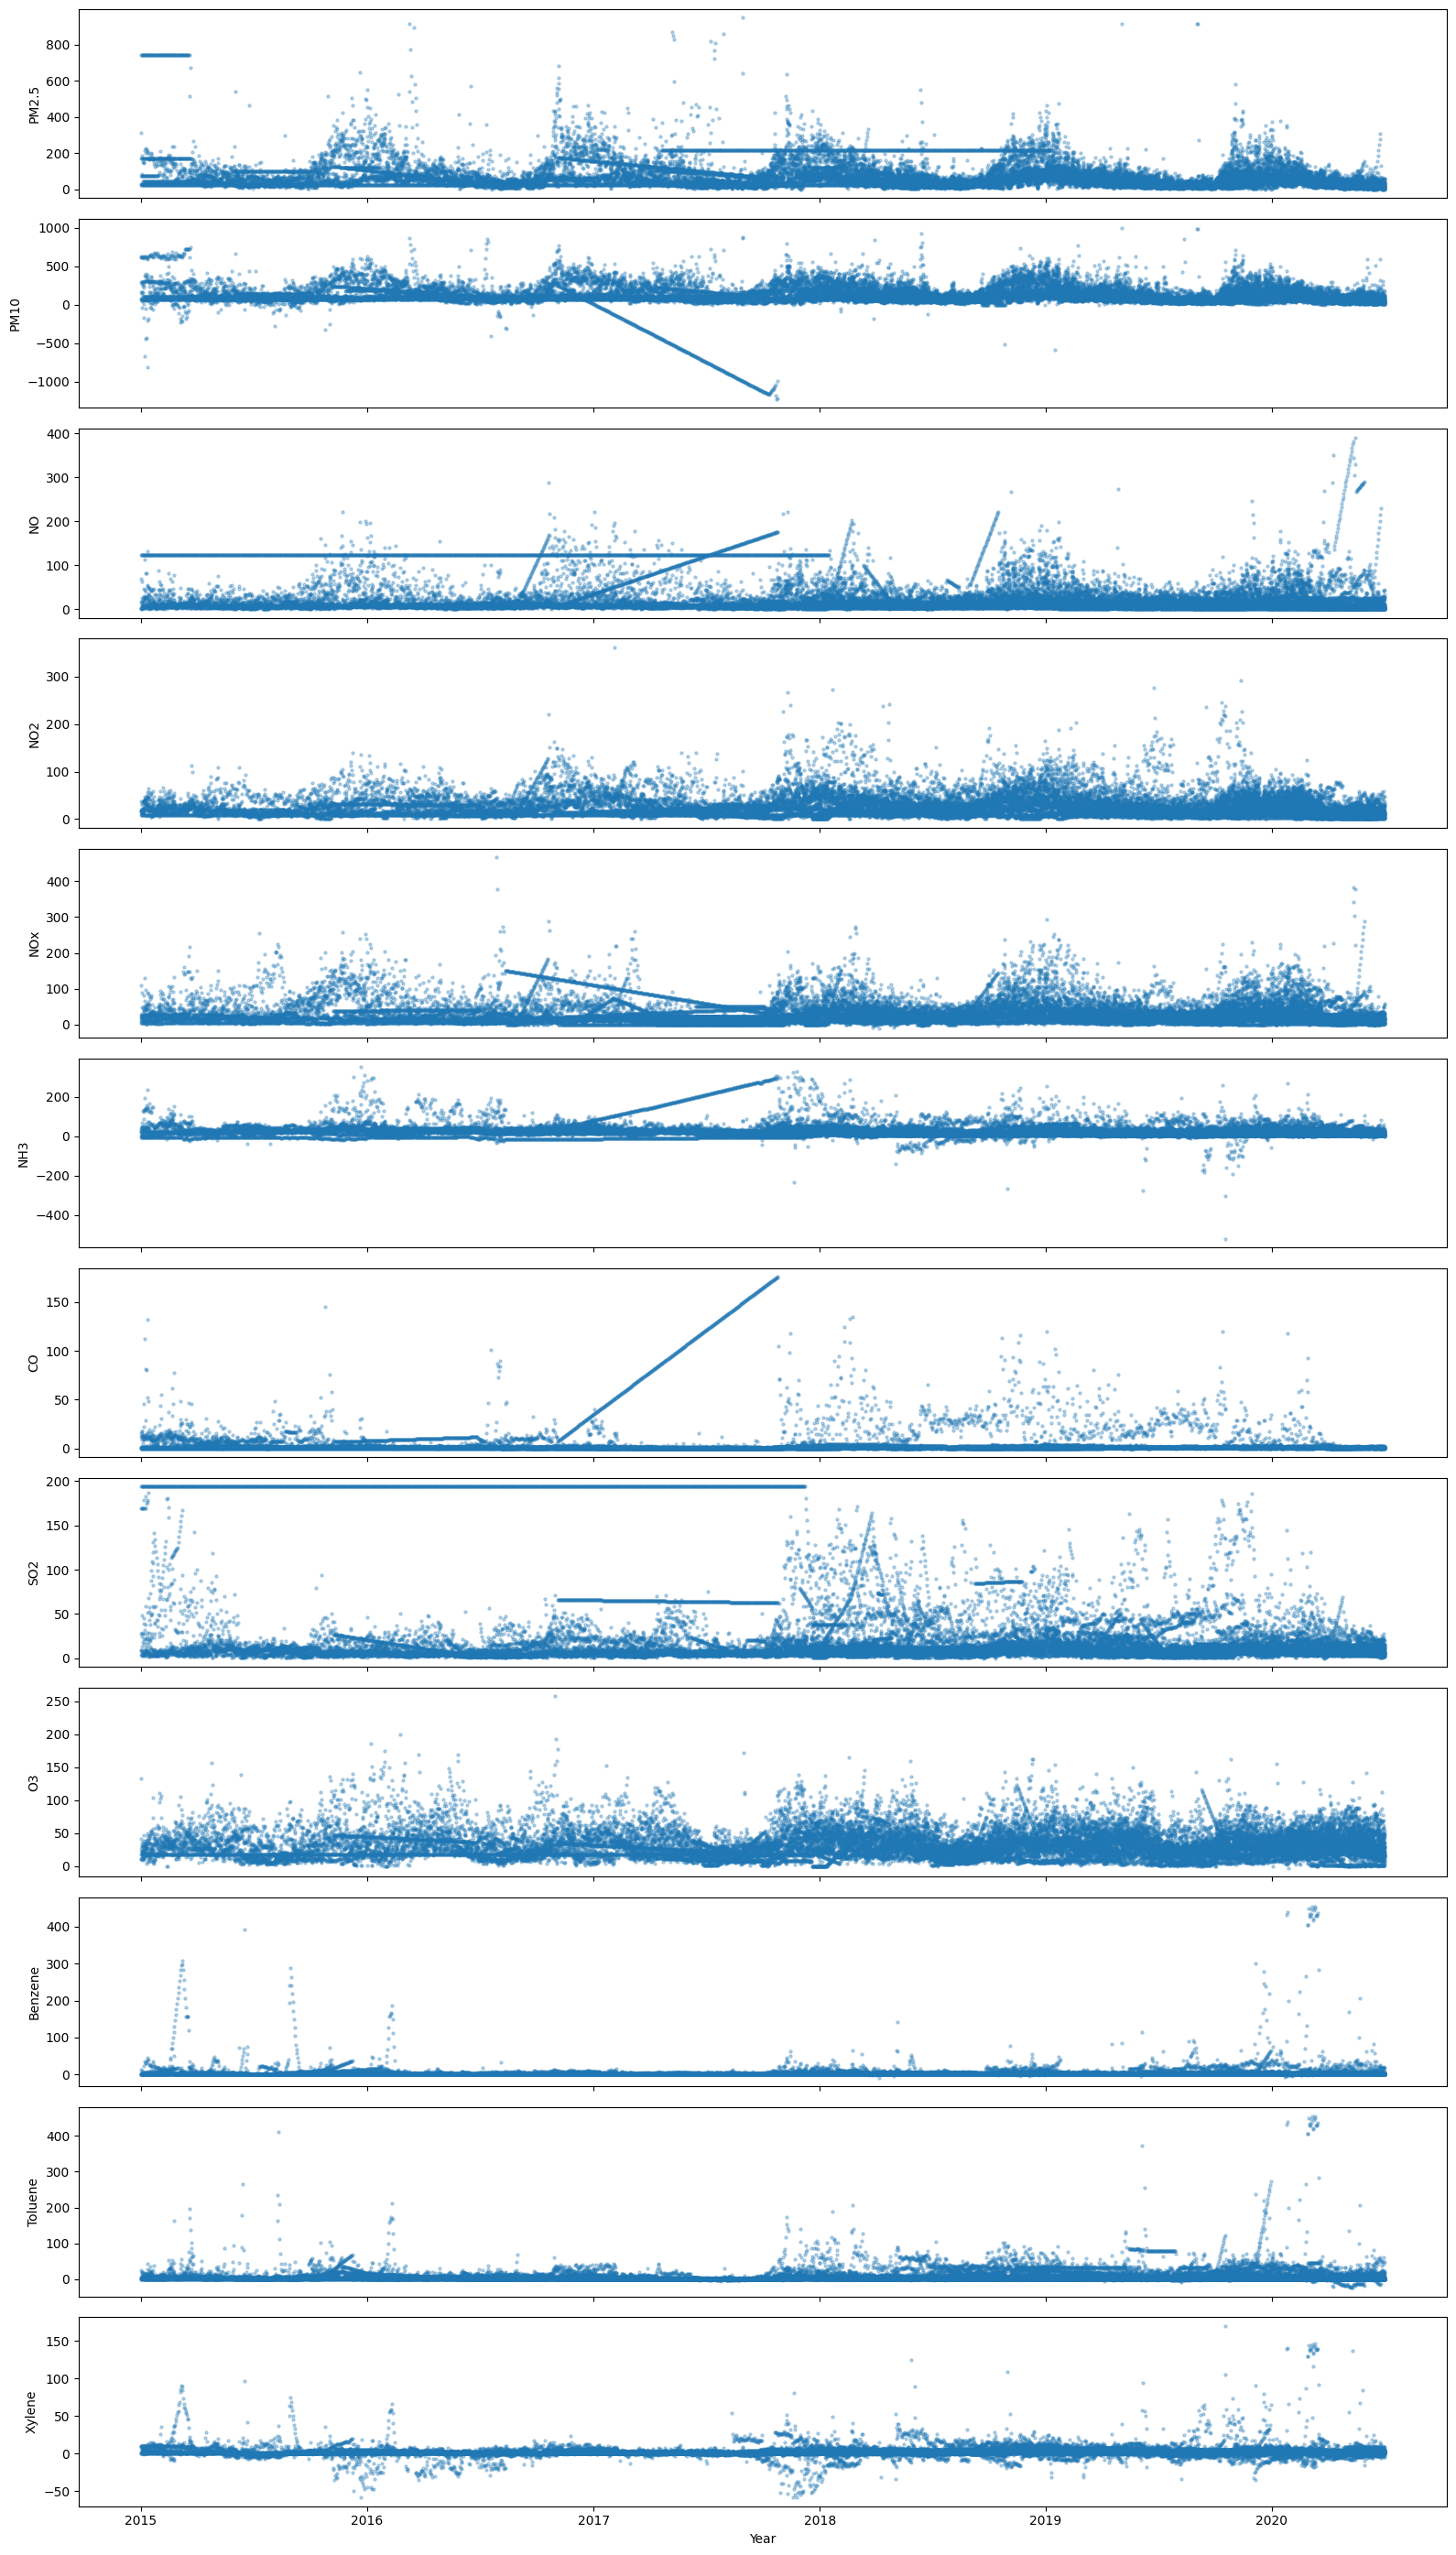

In [57]:
pollutants = pollutant_cols

fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 28), sharex=True)

for ax, col in zip(axes, pollutants):
    ax.scatter(df.index, df[col], s=5, alpha=0.3)
    ax.set_ylabel(col)

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()
